In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split

mpl.rcParams['font.sans-serif'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

digits = datasets.load_digits()  # 使用 scikit-learn 自带的 digits 数据集
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                              digits.target, 
                                              test_size=0.25, 
                                              random_state=0,
                                              stratify=digits.target)  # 分层采样

E:\software\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
def test_GradientBoostingClassifier(*data):
    X_train, X_test, y_train, y_test = data
    clf = ensemble.GradientBoostingClassifier()
    clf.fit(X_train, y_train)
    print("模型详情:", clf)
    print("Traing Score:%f" % clf.score(X_train, y_train))
    print("Testing Score:%f" % clf.score(X_test, y_test))

test_GradientBoostingClassifier(X_train, X_test, y_train, y_test)

模型详情: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
Traing Score:1.000000
Testing Score:0.960000


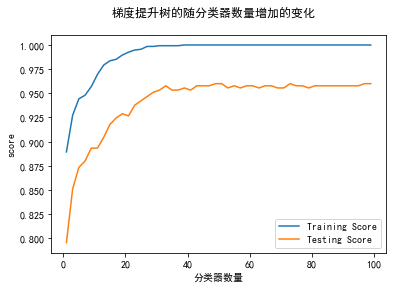

In [3]:
def test_GradientBoostingClassifier_num(*data):
    X_train, X_test, y_train, y_test = data
    nums = np.arange(1, 100, step=2)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    testing_scores = []
    training_scores = []
    for num in nums:
        clf = ensemble.GradientBoostingClassifier(n_estimators=num)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(nums, training_scores, label="Training Score")
    ax.plot(nums, testing_scores, label="Testing Score")
    ax.set_xlabel("分类器数量")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    plt.suptitle("梯度提升树结果随分类器数量增加的变化")
    plt.show()
    
test_GradientBoostingClassifier_num(X_train, X_test, y_train, y_test)

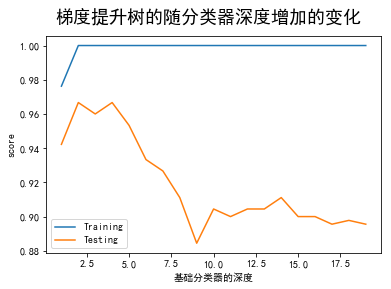

In [4]:
def test_GradientBoostingClassifier_maxdepth(*data):
    X_train, X_test, y_train, y_test = data
    maxdepths = np.arange(1, 20)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    testing_scores = []
    training_scores = []
    for maxdepth in maxdepths:
        clf = ensemble.GradientBoostingClassifier(max_depth=maxdepth, 
                                                  # 默认深度是3
                                                  max_leaf_nodes=None)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(maxdepths, training_scores, label="Training")
    ax.plot(maxdepths, testing_scores, label="Testing")
    ax.set_xlabel("基础分类器的深度")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    plt.suptitle("梯度提升树结果随分类器深度增加的变化", fontsize=18)
    plt.show()
    
test_GradientBoostingClassifier_maxdepth(X_train, X_test, y_train, y_test)

E:\software\anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
E:\software\anaconda3\lib\site-packages\matplotlib\mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


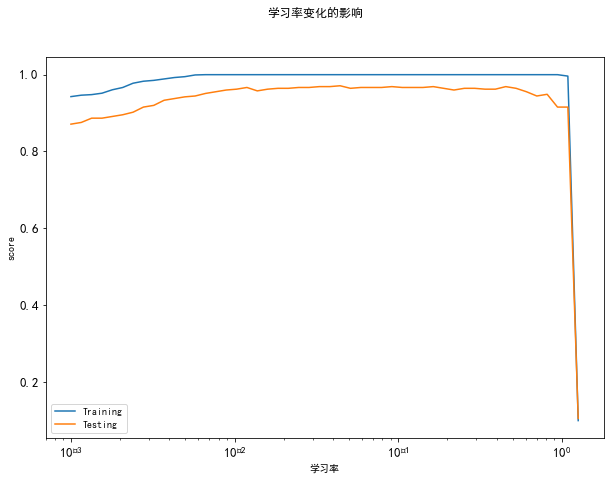

In [5]:
def test_GradientBoostingClassifier_learning(*data):
    X_train, X_test, y_train, y_test = data
    learnings = np.logspace(-3, 0.1)
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(1, 1, 1)
    testing_scores = []
    training_scores = []
    for learning in learnings:
        clf = ensemble.GradientBoostingClassifier(learning_rate=learning, 
                                                 n_estimators=500)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(learnings, training_scores, label="Training")
    ax.plot(learnings, testing_scores, label="Testing")
    ax.set_xlabel("学习率")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    plt.suptitle("学习率变化的影响")
    ax.set_xscale('log')
    plt.tick_params(labelsize=13)
    plt.show()
    
test_GradientBoostingClassifier_learning(X_train, X_test, y_train, y_test)

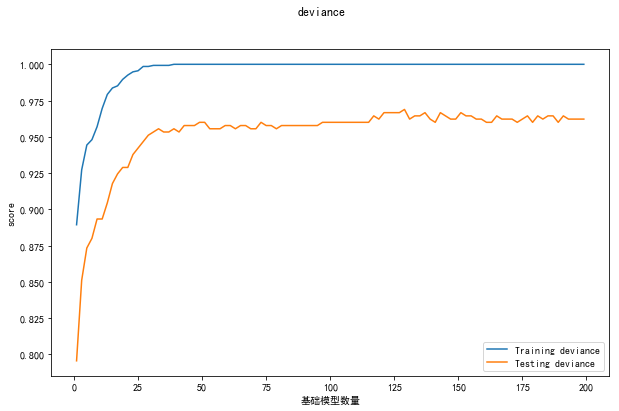

In [3]:
def test_GradientBoostingClassifier_loss(*data):
    X_train, X_test, y_train, y_test = data
    loss = ["deviance"] # "exponential"只能用于二分类
    nums = np.arange(1, 200, step=2)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)
    for i, loss_method in enumerate(loss):
        testing_scores = []
        training_scores = []
        for num in nums:
            clf = ensemble.GradientBoostingClassifier(loss=loss_method, 
                                                      n_estimators=num)
            clf.fit(X_train, y_train)
            training_scores.append(clf.score(X_train, y_train))
            testing_scores.append(clf.score(X_test, y_test))
        ax.plot(nums, training_scores, label="Training "+loss_method)
        ax.plot(nums, testing_scores, label="Testing "+loss_method)
        ax.set_xlabel("基础模型数量")
        ax.set_ylabel("score")
        ax.legend(loc="best")
        plt.suptitle(loss_method)

    plt.show()
    
test_GradientBoostingClassifier_loss(X_train, X_test, y_train, y_test)

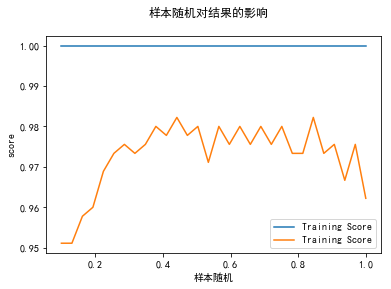

In [6]:
def test_GradientBoostingClassifier_subsample(*data):
    X_train, X_test, y_train, y_test = data
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    subsamples = np.linspace(0.1, 1.0, 30)
    testing_scores = []
    training_scores = []
    for subsample in subsamples:
        clf = ensemble.GradientBoostingClassifier(subsample=subsample, 
                                                 n_estimators=300)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(subsamples, training_scores, label="Training Score")
    ax.plot(subsamples, testing_scores, label="Training Score")
    ax.set_xlabel("样本随机")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    plt.suptitle("样本随机对结果的影响")
    plt.show()
    
test_GradientBoostingClassifier_subsample(X_train, X_test, y_train, y_test)

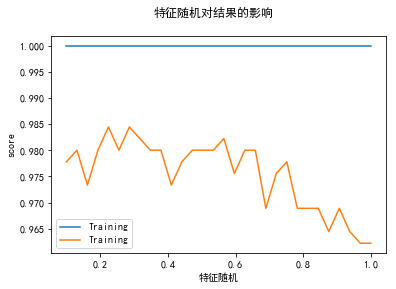

In [7]:
def test_GradientBoostingClassifier_max_features(*data):
    X_train, X_test, y_train, y_test = data
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    max_features = np.linspace(0.1, 1.0, 30)
    testing_scores = []
    training_scores = []
    for features in max_features:
        clf = ensemble.GradientBoostingClassifier(max_features=features, 
                                                  n_estimators=300)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(max_features, training_scores, label="Training")
    ax.plot(max_features, testing_scores, label="Training")
    ax.set_xlabel("特征随机")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    plt.suptitle("特征随机对结果的影响")
    plt.show()

test_GradientBoostingClassifier_max_features(X_train,X_test,y_train,y_test)